## Handwritten digit recognition is the process to provide the ability to machines to recognize human handwritten digits. 

### Importing libraries and Loading Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
(X_train,y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(y_train)

60000

In [5]:
len(X_test)

10000

In [6]:
len(y_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

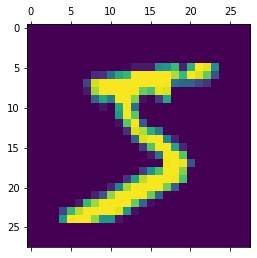

In [9]:
plt.matshow(X_train[0])

## Data preprocessing

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
y_train[0]

5

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
#converting shape of 2d array
X_train_Reshape_flattend = X_train.reshape(len(X_train) , 28*28)
X_test_Reshape_flattend = X_test.reshape(len(X_test) , 28*28)


In [15]:
X_train_Reshape_flattend.shape

(60000, 784)

In [16]:
X_test_Reshape_flattend.shape

(10000, 784)

In [17]:
X_train_Reshape_flattend[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Artificial Neural Network

## Model Building

In [18]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss ='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_Reshape_flattend , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4688 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3045 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2671 - accuracy: 0.9261


In [19]:
#model evaluation
model.evaluate(X_test_Reshape_flattend,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2672 - accuracy: 0.9274


[0.267179012298584, 0.9273999929428101]

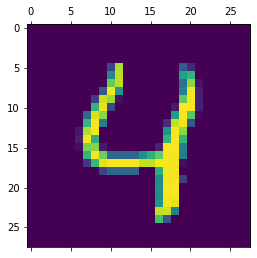

In [20]:
plt.matshow(X_test[4])

In [21]:
#lets try predict values
y_predict = model.predict(X_test_Reshape_flattend)
y_predict[4]

array([3.9222389e-02, 5.7520425e-05, 1.5636241e-01, 3.7381053e-03,
       9.8987877e-01, 1.1318535e-02, 1.9985247e-01, 2.1288711e-01,
       3.8247627e-01, 7.3490793e-01], dtype=float32)

In [22]:
#maximum value of predictions 
np.argmax(y_predict[4])

4

In [23]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [25]:
confusion_matrix_data = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)
confusion_matrix_data

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    4,    9,    2,    1,    0],
       [   0, 1113,    4,    1,    0,    1,    4,    2,   10,    0],
       [   6,    9,  921,   15,   11,    3,   13,   10,   41,    3],
       [   4,    0,   20,  899,    0,   32,    3,   10,   34,    8],
       [   1,    1,    2,    1,  920,    0,   13,    3,   11,   30],
       [  10,    2,    2,   21,   11,  780,   19,    4,   36,    7],
       [   9,    3,    5,    1,    7,    7,  921,    2,    3,    0],
       [   1,    5,   25,    5,    8,    0,    0,  950,    5,   29],
       [   6,    8,    6,   14,    9,   23,   10,    6,  886,    6],
       [  11,    7,    1,    7,   27,    6,    0,   17,   10,  923]])>

Text(69.0, 0.5, 'True')

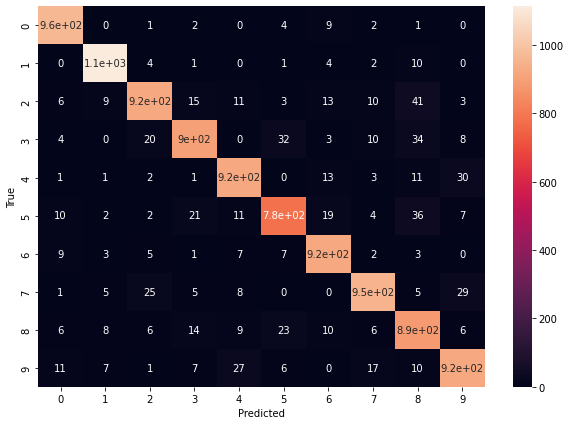

In [26]:
#plotting confusion matrix plot to check diffrence of our actual values and predicted values
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_data , annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

## Adding Hidden Layers to Improve model accuracy

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss ='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_Reshape_flattend , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2695 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1219 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0851 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0652 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0525 - accuracy: 0.9837


### observation:-
using hidden layer with activation function relu the accuracy of model is increased

In [28]:
model.evaluate(X_test_Reshape_flattend,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0830 - accuracy: 0.9755


[0.0829864963889122, 0.9754999876022339]

Text(69.0, 0.5, 'True')

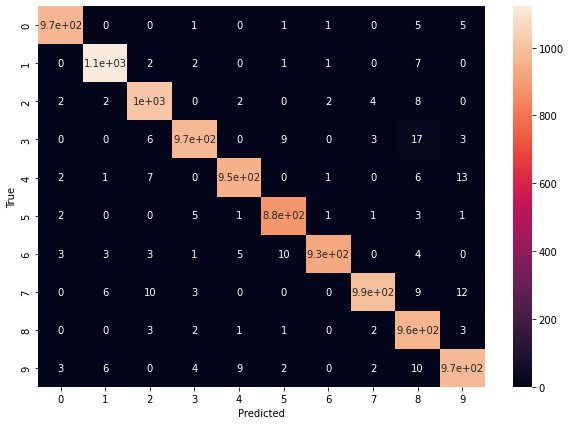

In [29]:
y_predict = model.predict(X_test_Reshape_flattend)
y_predict_labels = [np.argmax(i) for i in y_predict]
confusion_matrix_data = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)

#plotting confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_data , annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

## Applying Convolutional Neural Network

In [30]:
input_shape = (28, 28, 1)

In [31]:
#importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


In [32]:
#training model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x= X_train ,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2111 - accuracy: 0.9369
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0836 - accuracy: 0.9746
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0583 - accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0437 - accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0366 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0284 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0263 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0220 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0198 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 28s 15m

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0621 - accuracy: 0.9843


[0.06207023188471794, 0.9843000173568726]

In [35]:
model.save('model.hdf5')